# Scanning Session Ingestion

## Setup

### Connect to the database

If you are don't have your login information, contact the administrator.

Using local config file (see [01_pipeline](./01_pipeline.ipynb)):

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, event, trial, imaging
from adamacs import utility
from adamacs.ingest import behavior as ibe
import numpy as np
import scanreader

[2023-01-17 08:58:29,743][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-01-17 08:58:30,386][INFO]: Connected tobiasr@172.26.128.53:3306


Manual entry:

In [ ]:
# Manual Entry
import datajoint as dj; import getpass
dj.config['database.host'] = '172.26.128.53'        # Put the server name between these apostrophe
dj.config['database.user'] = 'root'             # Put your user name between these apostrophe
dj.config['database.password'] = getpass.getpass()  # Put your password in the prompt
dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, event, trial, imaging
from adamacs import utility
from adamacs.ingest import behavior as ibe
import numpy as np

## populate scaninfo

In [ ]:
scan.ScanInfo.describe()

In [2]:
scan.ScanInfo.heading

session_id           : varchar(12)                  # 
scan_id              : varchar(12)                  # 
---
nfields              : tinyint                      # number of fields
nchannels            : tinyint                      # number of channels
ndepths              : int                          # Number of scanning depths (planes)
nframes              : int                          # number of recorded frames
nrois                : tinyint                      # number of ROIs (see scanimage's multi ROI imaging)
x=null               : float                        # (um) ScanImage's 0 point in the motor coordinate system
y=null               : float                        # (um) ScanImage's 0 point in the motor coordinate system
z=null               : float                        # (um) ScanImage's 0 point in the motor coordinate system
fps                  : float                        # (Hz) frames per second - Volumetric Scan Rate
bidirectional        : tinyint        

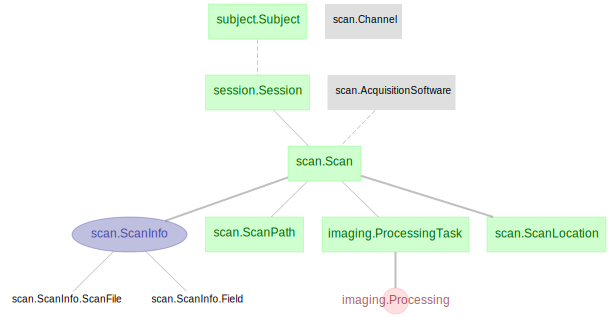

In [3]:
dj.Diagram(subject.Subject) + dj.Diagram(session.Session) + dj.Diagram(scan) + dj.Diagram(imaging.Processing)

In [ ]:
# scan.ScanInfo.delete()
# scan.Scan.delete()
# session.Session.delete()

In [ ]:
scan.Scan()

## populate scan!

In [ ]:
populate_settings = {'display_progress': True}

In [13]:
scan.ScanInfo.populate(**populate_settings)
scan.ScanInfo()

session_id,scan_id,nfields number of fields,nchannels number of channels,ndepths Number of scanning depths (planes),nframes number of recorded frames,nrois number of ROIs (see scanimage's multi ROI imaging),x (um) ScanImage's 0 point in the motor coordinate system,y (um) ScanImage's 0 point in the motor coordinate system,z (um) ScanImage's 0 point in the motor coordinate system,fps (Hz) frames per second - Volumetric Scan Rate,bidirectional true = bidirectional scanning,usecs_per_line microseconds per scan line,fill_fraction raster scan temporal fill fraction (see scanimage),scan_datetime datetime of the scan,scan_duration (seconds) duration of the scan
sess9FG1TAXY,scan9FG1THFD,1,2,1,1500,0,nan,nan,nan,15.3845,1,250.003,0.95,None,97.5007
sess9FG1UAQG,scan9FG1UAQG,4,1,4,12,0,nan,nan,nan,3.0769,1,250.003,0.95,None,3.90003


In [ ]:
scan.ScanInfo()

In [ ]:
scan.Scan() * scan.ScanLocation()

Example to update an entry post-hoc. TODO: imnplement in elements "Scan" function based on userfunction stringa

In [ ]:
scan.Scan.update1({'session_id': 'sess9FF6TL96', 'scan_id': 'scan9FF6TL96', 'scan_notes': "test2"})

In [ ]:
scan.ScanLocation.update1({'session_id': 'sess9FF6TL96', 'scan_id': 'scan9FF6TL96', 'anatomical_location': "V1"})

In [ ]:
session.ProjectSession()

In [ ]:
scan.Scan()

In [ ]:
scan.ScanLocation()

### Creating a Parameter Set

What exactly happens during processing dependso on the parameter set. This is an example of a parameter set and its insert:

In [ ]:
# Insert the param_set

# TODO: Parameter set needs to be updated with ScanInfo settings

params_suite2p = {'look_one_level_down': 0.0,
                  'fast_disk': [],
                  'delete_bin': False,
                  'mesoscan': False,
                  'h5py': [],
                  'h5py_key': 'data',
                  'save_path0': [],
                  'subfolders': [],
                  'nplanes': 1,
                  'nchannels': 1,
                  'functional_chan': 1,
                  'tau': 1.0,
                  'fs': 10.0,
                  'force_sktiff': False,
                  'preclassify': 0.0,
                  'save_mat': False,
                  'combined': True,
                  'aspect': 1.0,
                  'do_bidiphase': False,
                  'bidiphase': 0.0,
                  'do_registration': True,
                  'keep_movie_raw': False,
                  'nimg_init': 300,
                  'batch_size': 500,
                  'maxregshift': 0.1,
                  'align_by_chan': 1,
                  'reg_tif': False,
                  'reg_tif_chan2': False,
                  'subpixel': 10,
                  'smooth_sigma': 1.15,
                  'th_badframes': 1.0,
                  'pad_fft': False,
                  'nonrigid': True,
                  'block_size': [128, 128],
                  'snr_thresh': 1.2,
                  'maxregshiftNR': 5.0,
                  '1Preg': False,
                  'spatial_hp': 50.0,
                  'pre_smooth': 2.0,
                  'spatial_taper': 50.0,
                  'roidetect': True,
                  'sparse_mode': False,
                  'diameter': 12,
                  'spatial_scale': 0,
                  'connected': True,
                  'nbinned': 5000,
                  'max_iterations': 20,
                  'threshold_scaling': 1.0,
                  'max_overlap': 0.75,
                  'high_pass': 100.0,
                  'inner_neuropil_radius': 2,
                  'min_neuropil_pixels': 350,
                  'allow_overlap': False,
                  'chan2_thres': 0.65,
                  'baseline': 'maximin',
                  'win_baseline': 60.0,
                  'sig_baseline': 10.0,
                  'prctile_baseline': 8.0,
                  'neucoeff': 0.7,
                  'xrange': np.array([0, 0]),
                  'yrange': np.array([0, 0])}

imaging.ProcessingParamSet.insert_new_params('suite2p', 2, 'basic params', params_suite2p)

In [22]:
imaging.ProcessingTask().delete()
# imaging.ProcessingTask().drop()
# imaging.ProcessingParamSet().drop()

[2023-01-16 21:51:42,245][INFO]: Deleting 1 rows from `tobiasr01_imaging`.`processing_task`


Deletes committed.


1

In [15]:
scan.Scan()

session_id,scan_id,scanner,acq_software,scan_notes free-notes
sess9FG1TAXY,scan9FG1THFD,mini2p1,ScanImage,
sess9FG1UAQG,scan9FG1UAQG,mini2p1,ScanImage,


### Create and Run a Processing Task

In [25]:
imaging.ProcessingTask.insert1(('sess9FG1TAXY',
                                'scan9FG1THFD',
                                2,
                                '',
                                'trigger'))

# inject directory names 

DuplicateError: ("Duplicate entry 'sess9FG1TAXY-scan9FG1THFD-2' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

To run all unprocessed processing task we call populate on processing:

In [24]:
imaging.Processing.populate(display_progress=True)

Processing:   0%|          | 0/1 [00:00<?, ?it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/trose/opt/miniconda3/envs/datajoint/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'data_path': ['/Users/trose/Data/TR_WEZ-8701_2023-01-13_scan9FG1THFD_sess9FG1TAXY'], 'tiff_list': ['/Users/trose/Data/TR_WEZ-8701_2023-01-13_scan9FG1THFD_sess9FG1TAXY/scan9FG1THFD_TR_WEZ-8701_00033.tif']}
tif
** Found 1 tifs - converting to binary **
2000 frames of binary, time 1.96 sec.
time 2.52 sec. Wrote 3000 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default /Users/trose/.suite2p/classifiers/classifier_user.npy
----------- REGISTRATION
Reference frame, 8.85 sec.
Registered 500/3000 in 9.03s
Registered 1000/3000 in 16.08s
Registered 1500/3000 in 22.67s
Registered 2000/3000 in 29.26s
Registered 2500/3000 in 35.78s
Registered 3000/3000 in 42.32s
----------- Total 54.76 sec
Registration metrics, 6.69 sec.
----------- ROI DETECTION
Binning movie in chunks of length 15
Binned movie of size [200,208,208] created in 0.67 se

[2023-01-16 22:08:16,362][WARNING]: MySQL server has gone away. Reconnecting to the server.
Processing:   0%|          | 0/1 [16:19<?, ?it/s]


LostConnectionError: Connection was lost during a transaction.

In [ ]:
imaging.scan()

In [ ]:
imaging.ProcessingTask()

In [ ]:
imaging.Processing()

In [ ]:
session_key = (session.Session & 'subject = "ROS-1438"').fetch('KEY')[0]

In [ ]:
scan.ScanInfo.ScanFile()


In [ ]:
scan.Scan & session_key

In [ ]:
scan.ScanInfo & session_key

In [ ]:
scan.ScanInfo.Field & session_key

In [ ]:
imaging.ProcessingParamSet()

In [ ]:
imaging.ProcessingTask * imaging.Processing & session_key

In [ ]:
imaging.Curation & session_key

Scanreader payload testing

In [ ]:
path = scan.ScanInfo.ScanFile().fetch('file_path')[0]
infoscan = scanreader.read_scan(path)

In [ ]:

infoscan.user_funtion


In [ ]:
scan.ScanInfo()

In [ ]:
session.Session()

In [ ]:
Sess